<a href="https://colab.research.google.com/github/jyotidabass/Gated-Sparse-autoencoder/blob/main/Gated_Sparse_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0766
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0175
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0112
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0089
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0076
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0068
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0063
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0059
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0057
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0055


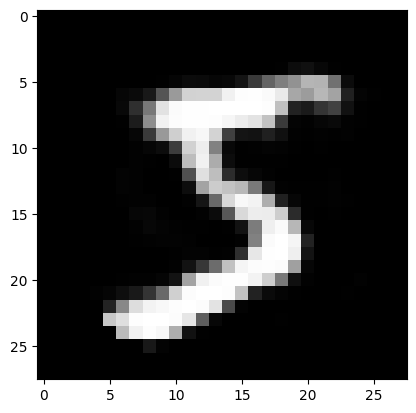

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Define the GSAE model
class GSAE(keras.Model):
    def __init__(self):
        super(GSAE, self).__init__()
        self.encoder = keras.layers.Dense(64, activation='relu', input_shape=(784,))
        self.gate = keras.layers.Dense(64, activation='sigmoid')
        self.decoder = keras.layers.Dense(784, activation='sigmoid')

    def call(self, x):
        encoded = self.encoder(x)
        gated = self.gate(encoded)
        decoded = self.decoder(gated * encoded)
        return decoded

# Define the dataset (e.g. MNIST images)
(x_train, _), (_, _) = keras.datasets.mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 784) / 255.0

# Create the GSAE model
gsae = GSAE()

# Compile the model
gsae.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
gsae.fit(x_train, x_train, epochs=10, batch_size=128)

# Test the model
test_img = x_train[0]
# Reshape test_img to add a batch dimension
test_img = test_img.reshape(1, -1)  # Reshape to (1, 784)
reconstructed_img = gsae(test_img)

# Visualize the results
import matplotlib.pyplot as plt
plt.imshow(test_img.reshape(28, 28), cmap='gray')
# Use tf.reshape to reshape the EagerTensor
plt.imshow(tf.reshape(reconstructed_img, (28, 28)), cmap='gray')
plt.show()